In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Experimentos del TP
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.


# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **EG**: Eliminacion Gaussiana.
- **LU**: Factorización LU.

# Experimentos
Leemos el dataframe con todos los resultados.

In [8]:
df_resultados_tiempos = pd.read_csv("./resultados/resultado.csv");
df_resultados_tiempos = df_resultados_tiempos.assign(metodo=df_resultados_tiempos.metodo.map({"0": "EG", "1": "LU"}))

df_resultados_tiempos_EG = df_resultados_tiempos[df_resultados_tiempos["metodo"] == "EG"]
df_resultados_tiempos_LU = df_resultados_tiempos[df_resultados_tiempos["metodo"] == "LU"]


# Carga de .out

In [7]:
def cargar_archivo_a_dataframe(dataframe, archivo):
    with open(archivo, 'r') as f:
        lista_temperaturas = f.read().splitlines()
        f.close()
    dataframe.loc[len(dataframe.index)] = [archivo, lista_temperaturas]



df = pd.DataFrame({'instancia': [],
                   'lista_temperaturas': []})
cargar_archivo_a_dataframe(df, "./resultados/instancia_ideal/5X5.out")
df

/home/agustin/.virtualenvs/metnum/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:883: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


,instancia,lista_temperaturas
0,./resultados/instancia_ideal/5X5.out,"[1500.000000, 1500.000000, 1500.000000, 1500.0..."


In [3]:
df_resultados_tiempos

,entrada,salida,metodo,tiempo
0,instancias/instancia_ideal/30X30.in,resultados/instancia_ideal/30X30.out,EG,3784.52
1,instancias/instancia_ideal/35X50.in,resultados/instancia_ideal/35X50.out,EG,27560.4
2,instancias/instancia_ideal/25X5.in,resultados/instancia_ideal/25X5.out,EG,13.5305
3,instancias/instancia_ideal/5X15.in,resultados/instancia_ideal/5X15.out,EG,3.26496
4,instancias/instancia_ideal/25X15.in,resultados/instancia_ideal/25X15.out,EG,275.412
...,...,...,...,...
436,instancias/instancia_intercalada/10X10.in,resultados/instancia_intercalada/10X10.out,LU,6.86203
437,instancias/instancia_intercalada/40X50.in,resultados/instancia_intercalada/40X50.out,LU,44169.8
438,instancias/instancia_intercalada/20X25.in,resultados/instancia_intercalada/20X25.out,LU,679.775
439,instancias/instancia_intercalada/35X30.in,resultados/instancia_intercalada/35X30.out,LU,6408.33


# Separamos los datos en diferentes dataframes

In [4]:
df_resultados_inst_live_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_live') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_live_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_live') for inst in df_resultados_tiempos_LU["entrada"]
]]

In [5]:
df_resultados_ideal_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_ideal') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_ideal_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_ideal') for inst in df_resultados_tiempos_LU["entrada"]
]]

In [6]:
df_resultados_prendido_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_prendido') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_prendido_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_prendido') for inst in df_resultados_tiempos_LU["entrada"]
]]

In [7]:
df_resultados_intercalada_EG = df_resultados_tiempos_EG[[
    inst.startswith('instancias/instancia_intercalada') for inst in df_resultados_tiempos_EG["entrada"]
]]

df_resultados_inst_intercalada_LU = df_resultados_tiempos_LU[[
    inst.startswith('instancias/instancia_intercalada') for inst in df_resultados_tiempos_LU["entrada"]
]]

In [8]:
df_resultados_inst_prendido_LU



,entrada,salida,metodo,tiempo
230,instancias/instancia_prendido/prendido_40.in,resultados/instancia_prendido/prendido_40.out,LU,414.72
231,instancias/instancia_prendido/prendido_5.in,resultados/instancia_prendido/prendido_5.out,LU,366.86
232,instancias/instancia_prendido/prendido_50.in,resultados/instancia_prendido/prendido_50.out,LU,423.495
233,instancias/instancia_prendido/prendido_30.in,resultados/instancia_prendido/prendido_30.out,LU,401.279
234,instancias/instancia_prendido/prendido_35.in,resultados/instancia_prendido/prendido_35.out,LU,411.557
235,instancias/instancia_prendido/prendido_20.in,resultados/instancia_prendido/prendido_20.out,LU,395.274
236,instancias/instancia_prendido/prendido_25.in,resultados/instancia_prendido/prendido_25.out,LU,402.753
237,instancias/instancia_prendido/prendido_45.in,resultados/instancia_prendido/prendido_45.out,LU,422.417
238,instancias/instancia_prendido/prendido_15.in,resultados/instancia_prendido/prendido_15.out,LU,380.79
239,instancias/instancia_prendido/prendido_10.in,resultados/instancia_prendido/prendido_10.out,LU,366.129


In [9]:
#grafico sobre la performance por cantidad de instancias
def getInstancesValue(row):
    return int(row.entrada.split("_")[2].split(".")[0])
    
df_resultados_prendido_con_inst_LU = df_resultados_inst_prendido_LU.copy();
df_resultados_prendido_con_inst_LU["ninst"] = df_resultados_prendido_con_inst_LU.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_prendido_con_inst_LU =  df_resultados_prendido_con_inst_LU.sort_values(by="ninst")

    
df_resultados_prendido_con_inst_EG = df_resultados_prendido_EG.copy();
df_resultados_prendido_con_inst_EG["ninst"] = df_resultados_prendido_con_inst_EG.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_prendido_con_inst_EG =  df_resultados_prendido_con_inst_EG.sort_values(by="ninst")



In [10]:
#grafico sobre la performance por cantidad de instancias
    
df_resultados_live_con_inst_LU = df_resultados_inst_live_LU.copy();
df_resultados_live_con_inst_LU["ninst"] = df_resultados_live_con_inst_LU.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_live_con_inst_LU =  df_resultados_live_con_inst_LU.sort_values(by="ninst")

    
df_resultados_live_con_inst_EG = df_resultados_inst_live_EG.copy();
df_resultados_live_con_inst_EG["ninst"] = df_resultados_live_con_inst_EG.apply(lambda row: getInstancesValue(row), axis=1)
df_resultados_live_con_inst_EG =  df_resultados_live_con_inst_EG.sort_values(by="ninst")



In [11]:
df_resultados_live_con_inst_LU

,entrada,salida,metodo,tiempo,ninst
214,instancias/instancia_live/LIVE_5.in,resultados/instancia_live/LIVE_5.out,LU,365.131,5
215,instancias/instancia_live/LIVE_10.in,resultados/instancia_live/LIVE_10.out,LU,366.459,10
218,instancias/instancia_live/LIVE_15.in,resultados/instancia_live/LIVE_15.out,LU,385.146,15
212,instancias/instancia_live/LIVE_20.in,resultados/instancia_live/LIVE_20.out,LU,387.653,20
213,instancias/instancia_live/LIVE_25.in,resultados/instancia_live/LIVE_25.out,LU,385.121,25
219,instancias/instancia_live/LIVE_30.in,resultados/instancia_live/LIVE_30.out,LU,407.541,30
211,instancias/instancia_live/LIVE_35.in,resultados/instancia_live/LIVE_35.out,LU,404.298,35
210,instancias/instancia_live/LIVE_40.in,resultados/instancia_live/LIVE_40.out,LU,412.578,40
216,instancias/instancia_live/LIVE_45.in,resultados/instancia_live/LIVE_45.out,LU,421.658,45
217,instancias/instancia_live/LIVE_50.in,resultados/instancia_live/LIVE_50.out,LU,419.806,50


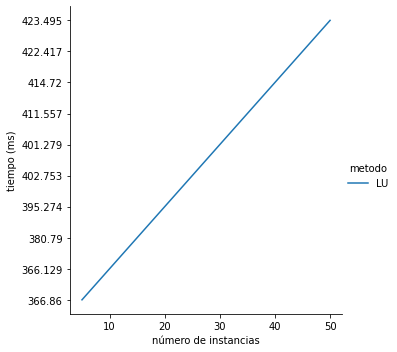

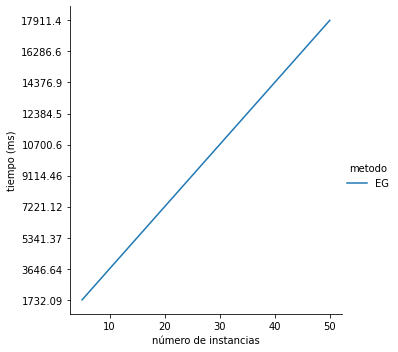

In [12]:
performanceLU=sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_prendido_con_inst_LU, hue="metodo");
performanceEG=sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_prendido_con_inst_EG, hue="metodo");
performanceLU.set(ylabel="tiempo (ms)", xlabel="número de instancias")
performanceEG.set(ylabel="tiempo (ms)", xlabel="número de instancias")
performanceLU.ax.invert_yaxis()
performanceEG.ax.invert_yaxis()
performanceLU.figure.savefig("performace-LU-prendido.png")
performanceEG.figure.savefig("performance-EG-prendido.png")
#sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_live_con_inst_LU);
#sns.relplot(x="ninst", y="tiempo", kind="line", data=df_resultados_live_con_inst_EG);

## heatmaps de performance


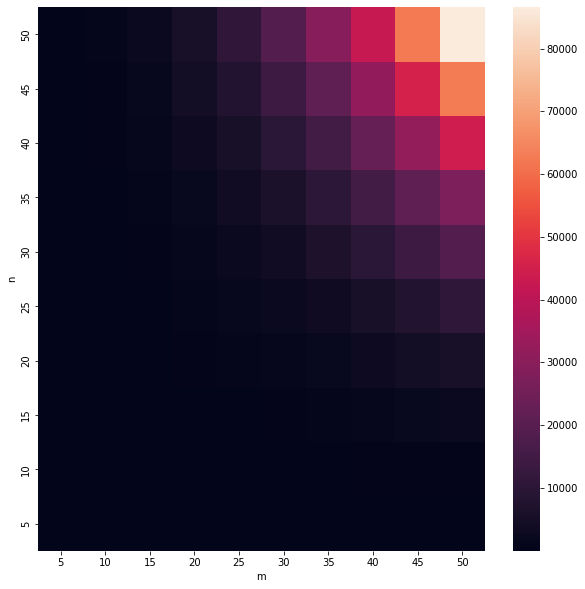

In [33]:
#tomo los datos para el heatmap de performance
def getNFromInstance(row):
    res = ""
    look=row.entrada.split("X")[0]
    for char in look:
        if char.isnumeric():
            res = res+char
    return int(res)

def getMFromInstance(row):
    res = ""
    look=row.entrada.split("X")[1]
    for char in look:
        if char.isnumeric():
            res = res+char
    return int(res)

def toFloat(row):
    return float(row.tiempo)
datosIdealEG = df_resultados_ideal_EG.copy()
datosIdealEG["n"] = datosIdealEG.apply(lambda row: getNFromInstance(row), axis=1)
datosIdealEG["m"] = datosIdealEG.apply(lambda row: getMFromInstance(row), axis=1)
datosIdealEG["tiempo"]=datosIdealEG.apply(lambda row: toFloat(row), axis=1)
heatmapData = datosIdealEG.pivot(columns="m", index="n", values="tiempo")
heatmapData = heatmapData.sort_index(axis=0)
heatmapData = heatmapData.sort_index(axis=1)

sns.color_palette("cubehelix")
fig, axs = plt.subplots(1,1, figsize=(10, 10))


grafico=sns.heatmap(heatmapData, ax=axs, fmt="f")
grafico.invert_yaxis()

In [26]:
heatmapData

m,5,10,15,20,25,30,35,40,45,50
n,,,,,,,,,,
5,0.148268,1.01565,3.26496,7.09551,13.4963,23.6911,34.7704,45.8774,66.2363,89.8237
10,1.115410,7.57834,21.99330,45.91990,87.7801,150.1870,240.7360,358.2170,506.5530,642.0810
15,3.200470,22.93310,66.91130,153.05800,283.3930,508.8380,800.8300,1218.1900,1707.2900,2337.5700
20,7.211980,45.57670,152.23400,353.24400,697.0550,1234.2100,1819.2800,2886.0900,4071.4700,5621.3300
25,13.530500,91.19900,275.41200,683.61600,1376.5400,2387.6500,3418.7300,5426.5800,7973.3300,10781.5000
30,21.556900,149.50800,488.03600,1175.96000,2425.7400,3784.5200,6510.7500,9634.7500,13708.3000,18668.2000
35,32.459100,238.60600,794.48100,1894.36000,3851.8300,6412.4000,10399.7000,15285.3000,21533.5000,27560.4000
40,47.290100,360.79300,1187.58000,2764.71000,5584.0100,9569.3900,15278.5000,22909.0000,31990.8000,44033.0000
45,61.304400,504.47200,1571.61000,4075.94000,7874.2800,13533.7000,21490.8000,31753.7000,45624.6000,62783.3000


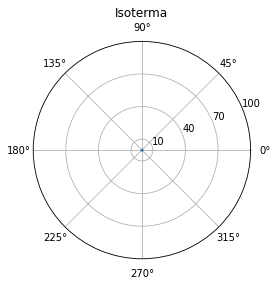

In [23]:
#Este codigo es de ejemplo, usa datos aleatorios

cantidad_puntos = 50
r = np.random.normal(0.5, 0.05, cantidad_puntos)
r[-1] = r[0] # Solo para que la isoterma se "pegue" bien al dar la vuelta
theta = np.linspace(0, 2*np.pi, cantidad_puntos)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rticks([10+90/3*x for x in range(4)])
ax.grid(True)

ax.set_title("Isoterma")
plt.show()

<ipython-input-18-b6a37d165c1b>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  grafico = ax.pcolor(theta, r, z, cmap='jet')


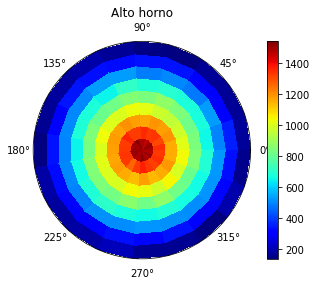

In [18]:
cantidad_angulos = 20
cantidad_radios = 10
theta = np.tile(np.linspace(0, 2*np.pi, cantidad_angulos), (cantidad_radios, 1)).transpose()
r = np.tile(np.linspace(0, 1, cantidad_radios), (cantidad_angulos, 1))
z = np.tile(np.linspace(1500,0,cantidad_radios), (cantidad_angulos,1))
z += np.random.standard_normal((cantidad_angulos,cantidad_radios))*20


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

grafico = ax.pcolor(theta, r, z, cmap='jet')
ax.set_title('Alto horno')

ax.set_yticklabels([])

fig.colorbar(grafico)
plt.show()

/tmp/ipykernel_54547/2023886515.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  grafico = ax.pcolor(theta, r, z, cmap='jet')


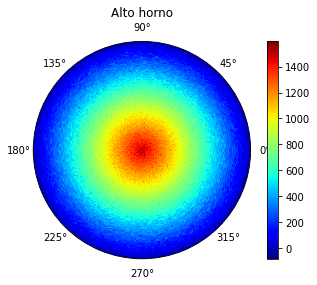

In [ ]:
cantidad_angulos = 200
cantidad_radios = 100
theta = np.tile(np.linspace(0, 2*np.pi, cantidad_angulos), (cantidad_radios, 1)).transpose()
r = np.tile(np.linspace(0, 1, cantidad_radios), (cantidad_angulos, 1))
z = np.tile(np.linspace(1500,0,cantidad_radios), (cantidad_angulos,1))
z += np.random.standard_normal((cantidad_angulos,cantidad_radios))*30


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

grafico = ax.pcolor(theta, r, z, cmap='jet')
ax.set_title('Alto horno')

ax.set_yticklabels([])

fig.colorbar(grafico)
plt.show()

In [15]:

def mapaCalorDelHorno (radio_interno, radio_externo, cantidad_radios, cantidad_angulos, temperaturas, titulo) :
    #theta es la forma de la matriz que luego es curvada
    theta = np.tile(np.linspace(0, 2*np.pi, cantidad_angulos), (cantidad_radios, 1)).transpose()
    #r es la forma fisica del horno
    r = np.tile(np.linspace(radio_interno, radio_externo, cantidad_radios), (cantidad_angulos, 1))
    #z son los valores del horno, cada fila es un rayo desde el centro hacia afuera del horno
    z = np.array(temperaturas).reshape((cantidad_radios, cantidad_angulos)).T


    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    grafico = ax.pcolor(theta, r, z, cmap='jet')
    ax.set_title(titulo)

    ax.set_yticklabels([])

    fig.colorbar(grafico)
    plt.show()

In [ ]:
def mostrarIsoterma (radio_interno, radio_externo, cantidad_angulos, puntos_isoterma, titulo) :

    r = puntos_isoterma
    r[-1] = r[0] # Solo para que la isoterma se "pegue" bien al dar la vuelta
    theta = np.linspace(0, 2*np.pi, cantidad_angulos)

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, r)
    ax.set_rticks([radio_interno+(radio_externo - radio_interno)/3*x for x in range(4)])
    ax.grid(True)

    ax.set_title(titulo)
    plt.show()